<a href="https://colab.research.google.com/github/GerV-M/Hypo-hyperthyroid-AI/blob/main/TechPractAIThyroid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [364]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
import warnings

warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

df = pd.read_csv('/content/thyroidDF.csv')

for i in df.columns:
  unique_count = df[i].nunique()
  frequency = df[i].value_counts()
  print(unique_count)
  print(frequency)
  print("-----------------------------")

100
age
60       209
62       208
72       207
59       201
61       192
        ... 
5          2
455        1
65511      1
65512      1
65526      1
Name: count, Length: 100, dtype: int64
-----------------------------
2
sex
F    6073
M    2792
Name: count, dtype: int64
-----------------------------
2
on_thyroxine
f    7932
t    1240
Name: count, dtype: int64
-----------------------------
2
query_on_thyroxine
f    9019
t     153
Name: count, dtype: int64
-----------------------------
2
on_antithyroid_meds
f    9056
t     116
Name: count, dtype: int64
-----------------------------
2
sick
f    8828
t     344
Name: count, dtype: int64
-----------------------------
2
pregnant
f    9065
t     107
Name: count, dtype: int64
-----------------------------
2
thyroid_surgery
f    9038
t     134
Name: count, dtype: int64
-----------------------------
2
I131_treatment
f    9003
t     169
Name: count, dtype: int64
-----------------------------
2
query_hypothyroid
f    8542
t     630
Name: count, dt

In [365]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,-,870119027


In [366]:
to_drop = ['I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'GK', 'AK', 'MK', 'C|I', 'KJ', 'GI', 'H|K', 'FK', 'MI', 'LJ', 'GKJ', 'OI', 'D|R']
df = df[~df['target'].isin(to_drop)]

for col in ['TSH', 'T3', 'TT4', 'T4U', 'FTI']:
    if col in df.columns:
        df[col] = df.groupby('target')[col].transform(lambda x: x.fillna(x.median()))

df['age'] = df['age'].clip(lower=0, upper=120)

df = df.drop(columns=['on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'query_hypothyroid', 'query_hyperthyroid', 'I131_treatment', 'thyroid_surgery', 'TBG', 'TBG_measured',
                      'referral_source', 'patient_id', 'FTI_measured', 'T3_measured', 'T4U_measured', 'TSH_measured', 'TT4_measured', 'goitre', 'tumor', 'psych'], errors='ignore')

df['sex'].fillna('F', inplace=True)

df = df.dropna()

In [367]:
for i in df.columns:
  unique_count = df[i].nunique()
  frequency = df[i].value_counts()
  print(unique_count)
  print(frequency)
  print("-----------------------------")

97
age
62    181
60    176
59    165
58    162
72    161
     ... 
94      2
9       1
4       1
5       1
95      1
Name: count, Length: 97, dtype: int64
-----------------------------
2
sex
F    5149
M    2396
Name: count, dtype: int64
-----------------------------
2
sick
f    7265
t     280
Name: count, dtype: int64
-----------------------------
2
pregnant
f    7512
t      33
Name: count, dtype: int64
-----------------------------
2
lithium
f    7459
t      86
Name: count, dtype: int64
-----------------------------
1
hypopituitary
f    7545
Name: count, dtype: int64
-----------------------------
355
TSH
1.30      904
0.10      223
1.10      212
1.40      198
1.20      196
         ... 
494.00      1
62.00       1
500.00      1
4.01        1
78.00       1
Name: count, Length: 355, dtype: int64
-----------------------------
80
T3
2.00    2419
1.80     524
1.90     379
2.10     361
1.70     356
        ... 
0.69       1
5.70       1
5.90       1
6.70       1
8.00       1
Name: count, Le

In [368]:
for i in df.columns:
  print(i, df[i].max(), '-----', df[i].min())

age 120 ----- 1
sex M ----- F
sick t ----- f
pregnant t ----- f
lithium t ----- f
hypopituitary f ----- f
TSH 530.0 ----- 0.005
T3 18.0 ----- 0.05
TT4 430.0 ----- 2.0
T4U 2.12 ----- 0.19
FTI 839.0 ----- 1.4
target G ----- -


In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7545 entries, 0 to 9171
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            7545 non-null   int64  
 1   sex            7545 non-null   object 
 2   sick           7545 non-null   object 
 3   pregnant       7545 non-null   object 
 4   lithium        7545 non-null   object 
 5   hypopituitary  7545 non-null   object 
 6   TSH            7545 non-null   float64
 7   T3             7545 non-null   float64
 8   TT4            7545 non-null   float64
 9   T4U            7545 non-null   float64
 10  FTI            7545 non-null   float64
 11  target         7545 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 766.3+ KB


<Figure size 1400x1000 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

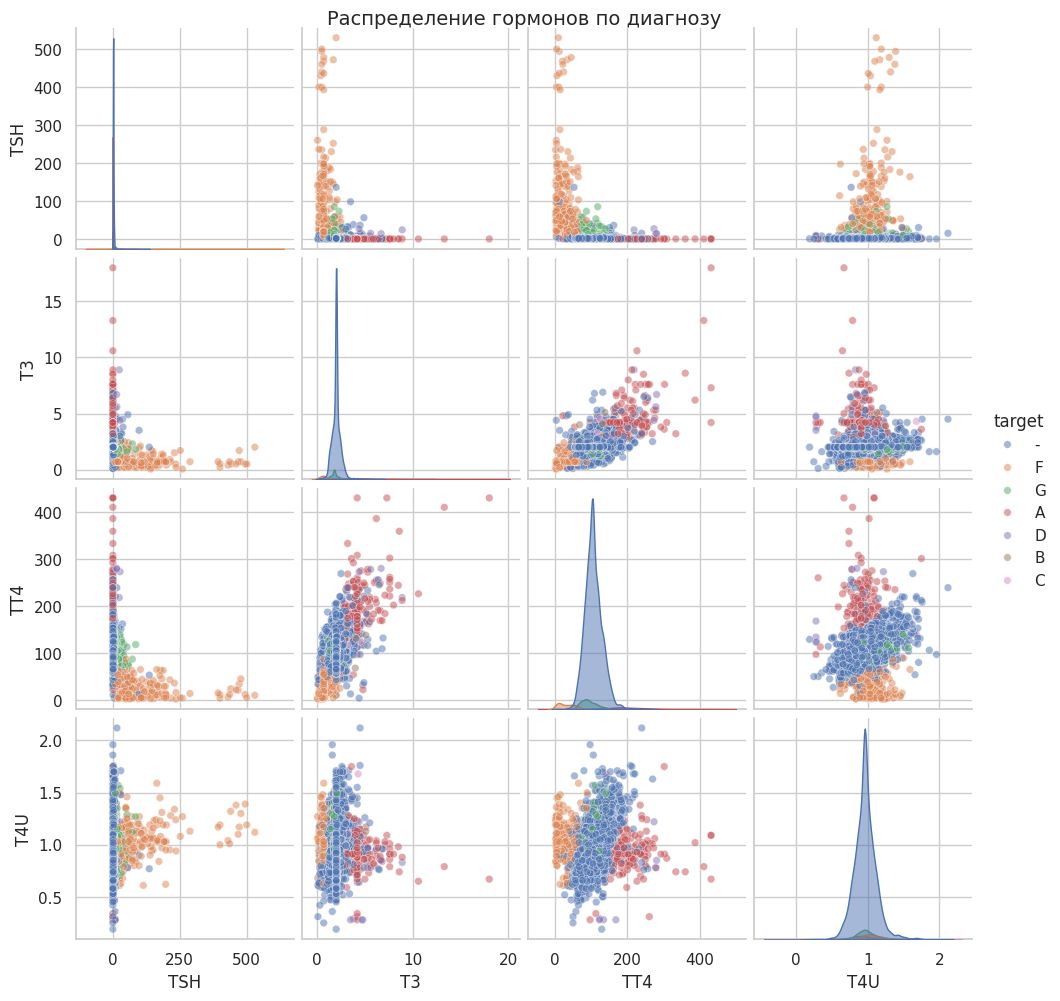

In [370]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))

hormones = ['TSH', 'T3', 'TT4', 'T4U', 'target']

sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
pair = sns.pairplot(
    df[hormones],
    hue='target',
    diag_kind='kde',
    plot_kws={'alpha': 0.5, 's': 30},
    diag_kws={'alpha': 0.5}
)

pair.fig.suptitle('Распределение гормонов по диагнозу', y=1, fontsize=14)
plt.show()

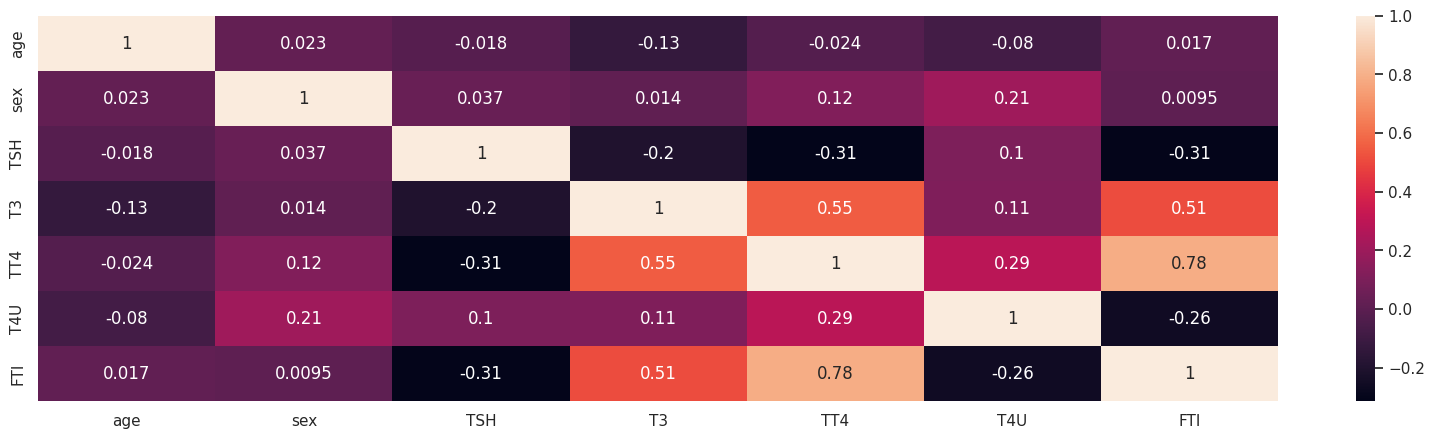

In [371]:
df['sex'] = df['sex'].map({'F':1, 'M':0})
df1 = df.select_dtypes(include=['number'])

plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(), annot = True);

In [372]:
for col in df.select_dtypes(include='object').columns.drop('target'):
    df[col] = df[col].map({'t': 1, 'f': 0})

X = df.drop(columns=['target'])
y = df['target']

selector = SelectKBest(score_func=f_classif, k=15)
X_new = selector.fit_transform(X.select_dtypes(include=[np.number]), y)

selected_features = X.select_dtypes(include=[np.number]).columns[selector.get_support()]
print("Отобранные признаки:", selected_features.tolist())

Отобранные признаки: ['age', 'sex', 'sick', 'pregnant', 'lithium', 'hypopituitary', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=15 is greater than n_features=11. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [373]:
frequency = df['target'].value_counts()
print(frequency)

target
-    6771
G     359
F     233
A     147
B      21
D       8
C       6
Name: count, dtype: int64


In [374]:
for col in df.select_dtypes(include='object'):
    if col != 'target':
        df[col] = df[col].map({'t':1, 'f':0})
df['target'] = df['target'].map({'-' : 0, 'A' : 1, 'B' : 1, 'C' : 1, 'D' : 1, 'E' : 2, 'F' : 2, 'G' : 2,'H' : 2}) #1 - hyperthyroid, 2 - hypothyroid

In [375]:
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [376]:
model = RandomForestClassifier(random_state = 42)
param_grid = {'n_estimators': [50, 100, 250, 500], 'max_depth': [None, 10, 25, 50]}

In [377]:
grid = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro')
grid.fit(X_train, y_train)

print("Лучшие параметры:", grid.best_params_)
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

Лучшие параметры: {'max_depth': None, 'n_estimators': 500}


In [378]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-macro:", f1_score(y_test, y_pred, average='macro'))

y_proba = best_model.predict_proba(X_test)
classes = best_model.classes_
roc_auc = roc_auc_score(y_test, y_proba, average='macro', multi_class='ovr', labels=classes)
print("ROC-AUC:", roc_auc)

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.9927104042412194
Precision: 0.9310079278625031
Recall: 0.9856902356902357
F1-macro: 0.9567925981606763
ROC-AUC: 0.9995236798744482
[[1376    5    5]
 [   1   27    0]
 [   0    0   95]]


In [380]:
data = {'age': None, 'sex': None, 'sick': None, 'pregnant': None, 'lithium': None, 'hypopituitary': None, 'TSH': None, 'T3': None, 'TT4': None, 'T4U': None, 'FTI': None}

X_data = pd.DataFrame([data])

In [381]:
prediction = best_model.predict(X_data)[0]

probabilities = best_model.predict_proba(X_data)[0]

if prediction == 0:
    diagnosis = "Здоров(а)"
elif prediction == 1:
    diagnosis = "Гипертиреоз"
elif prediction == 2:
    diagnosis = "Гипотиреоз"

print(f"Диагноз: {diagnosis}")
print(f"Вероятности: Здоров(а) = {probabilities[0]}, Гипертиреоз = {probabilities[1]}, Гипотиреоз = {probabilities[2]}")

Диагноз: Здоров(а)
Вероятности: Здоров(а) = 1.0, Гипертиреоз = 0.0, Гипотиреоз = 0.0
